In [47]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [34]:
path = "/home/firh/Documents/Kuliah/JOINTS/Datasets/train.csv.zip"
df = pd.read_csv(path,compression="zip", index_col = "Unnamed: 0")
df.head()

/tmp/ipykernel_120814/3862890474.py:2: DtypeWarning: Columns (1,3,5,6,7,8,9,10,11,12,13,16,17,19,20) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(path,compression="zip", index_col = "Unnamed: 0")


,floors_before_eq (total),old_building,plinth_area (ft^2),height_before_eq (ft),land_surface_condition,type_of_foundation,type_of_roof,type_of_ground_floor,type_of_other_floor,position,building_plan_configuration,technical_solution_proposed,legal_ownership_status,has_secondary_use,type_of_reinforcement_concrete,residential_type,no_family_residing,public_place_type,industrial_use_type,govermental_use_type,flexible_superstructure,wall_binding,wall_material,damage_grade
0,floor two,1.0,256 ft^2,22.0,Flat,Bamboo or Timber,Bamboo/Timber Light roof,Clay,TImber/Bamboo-Mud,Not attached,Rectangular,NaN,Private Use,0.0,0.0,Non-residential,1.0,Non-public,Non-industrial,Non-govermental,unavailable,0.0,0.0,1.0
1,Floor 3,3.0,985 ft^2,18.0,Flat,Clay Sand Mixed mortar-Stone/Brick,Wood Light Roof or Bamboo Heavy Roof,Clay,TImber/Bamboo-Mud,Not attached,Square,NaN,Private,0.0,0.0,Non-residential,1.0,Non-public,Non-industrial,Non-govermental,unavailable,5.0,2.0,5.0
2,Two Floor,7.0,NaN,14.0,Flat,Mud mortar-Stone/Brick,NaN,Clay,Wood-Mud or Bamboo Mud,Not attached,Rectangular,NaN,Private Use,0.0,0.0,Non-residential,1.0,Non-public,Non-industrial,Non-govermental,unavailable,5.0,2.0,5.0
3,two,18.0,185 ft^2,15.0,Flat,Clay Sand Mixed mortar-Stone/Brick,Wood Light Roof or Bamboo Light Roof,Clay,TImber/Bamboo-Mud,Not attached,Rectangular,NaN,Private,0.0,0.0,Non-residential,1.0,Non-public,Non-industrial,Non-govermental,unavailable,5.0,2.0,4.0
4,just 2 floor,22.0,290 ft^2,17.0,Flat,Clay Sand Mixed mortar-Stone/Brick,Bamboo or Timber Light roof,Clay,Timber Mud or Bamboo-Mud,Not attached,Rectangular,NaN,Private,0.0,0.0,Non-residential,1.0,Non-public,Non-industrial,Non-govermental,unavailable,5.0,2.0,1.0


In [35]:
df.columns

Index(['floors_before_eq (total)', 'old_building', 'plinth_area (ft^2)',
       'height_before_eq (ft)', 'land_surface_condition', 'type_of_foundation',
       'type_of_roof', 'type_of_ground_floor', 'type_of_other_floor',
       'position', 'building_plan_configuration',
       'technical_solution_proposed', 'legal_ownership_status',
       'has_secondary_use', 'type_of_reinforcement_concrete',
       'residential_type', 'no_family_residing', 'public_place_type',
       'industrial_use_type', 'govermental_use_type',
       'flexible_superstructure', 'wall_binding', 'wall_material',
       'damage_grade'],
      dtype='object')

1. Analisis Missing Value

<Axes: >

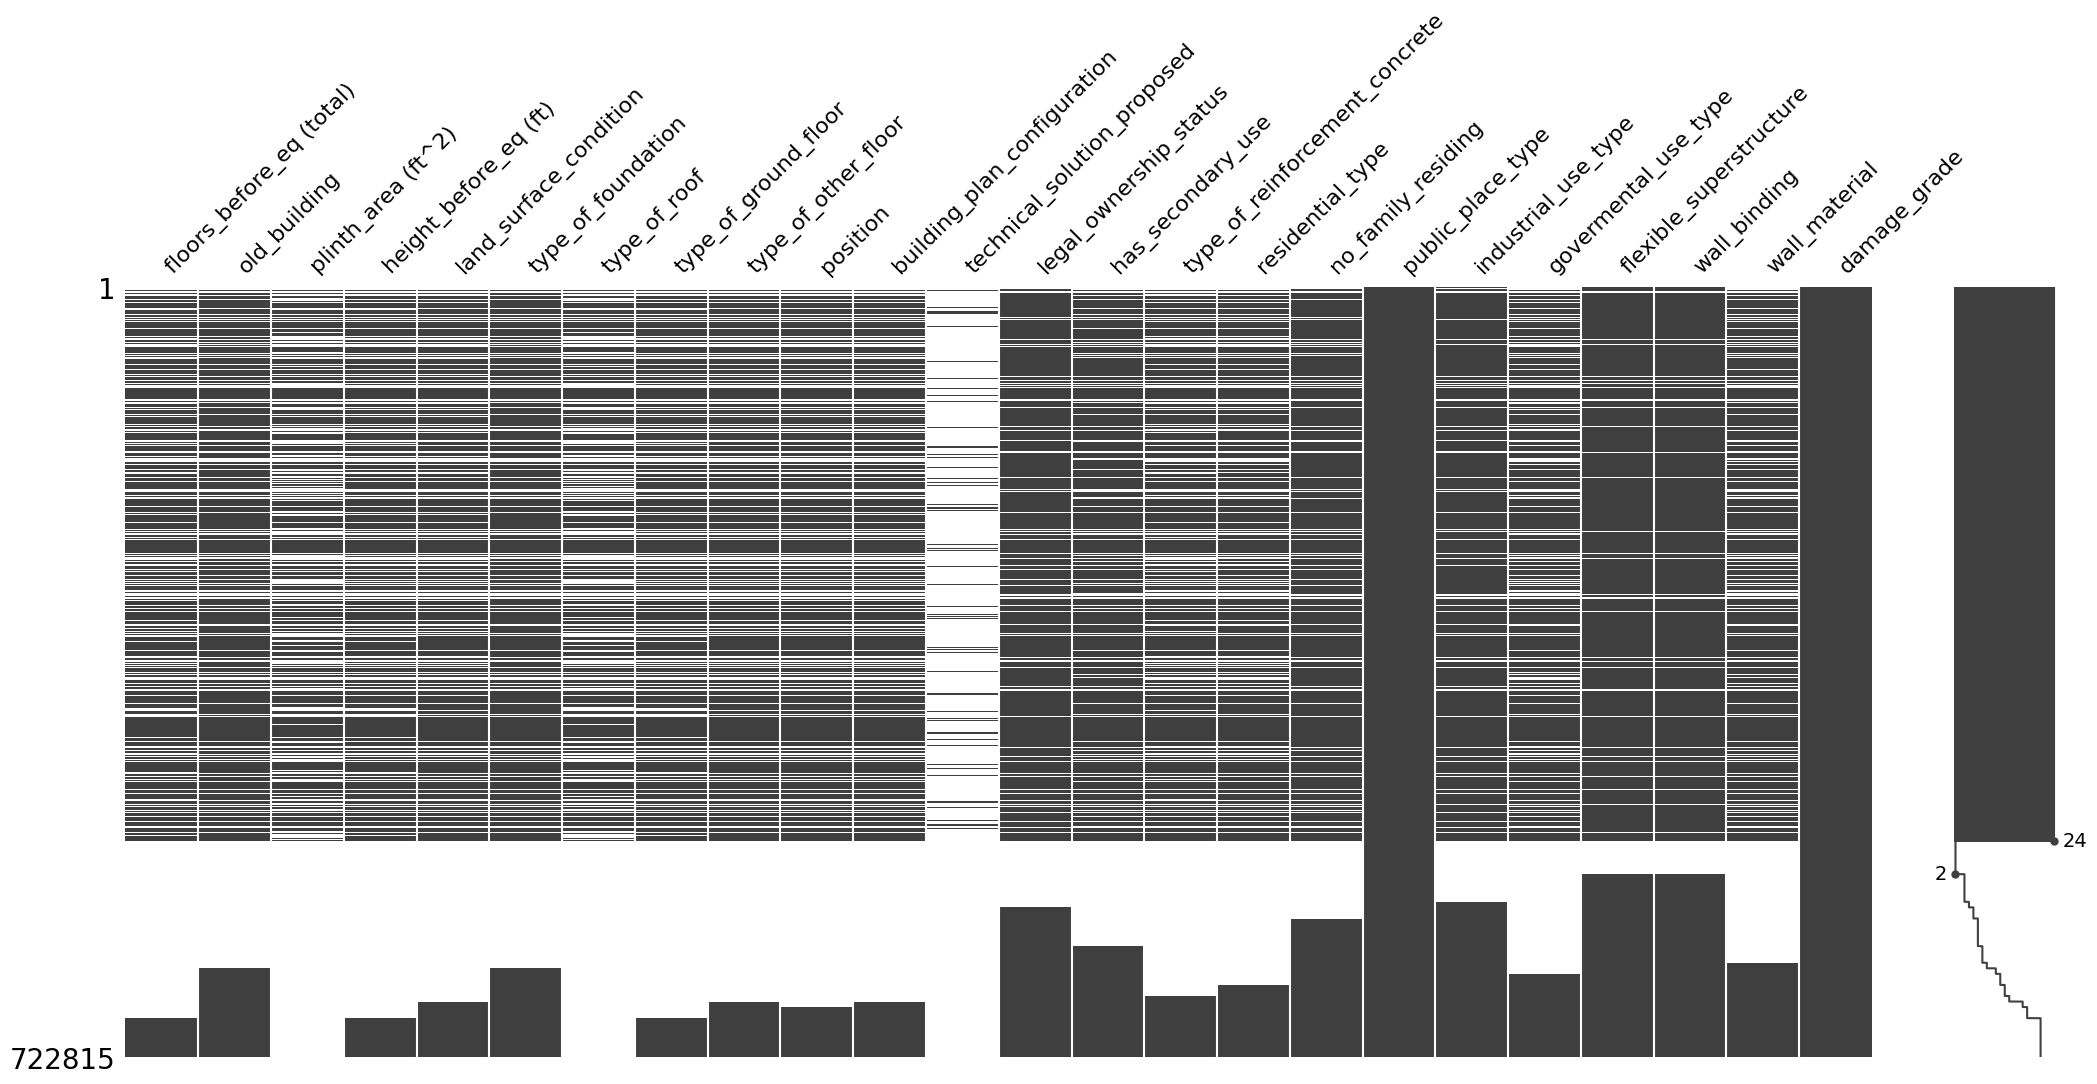

In [36]:
import missingno as msno
msno.matrix(df)

Missingno matrix menunjukkan bahwa kolom technical_solution_proposed memiliki missing value terbanyak

<Axes: >

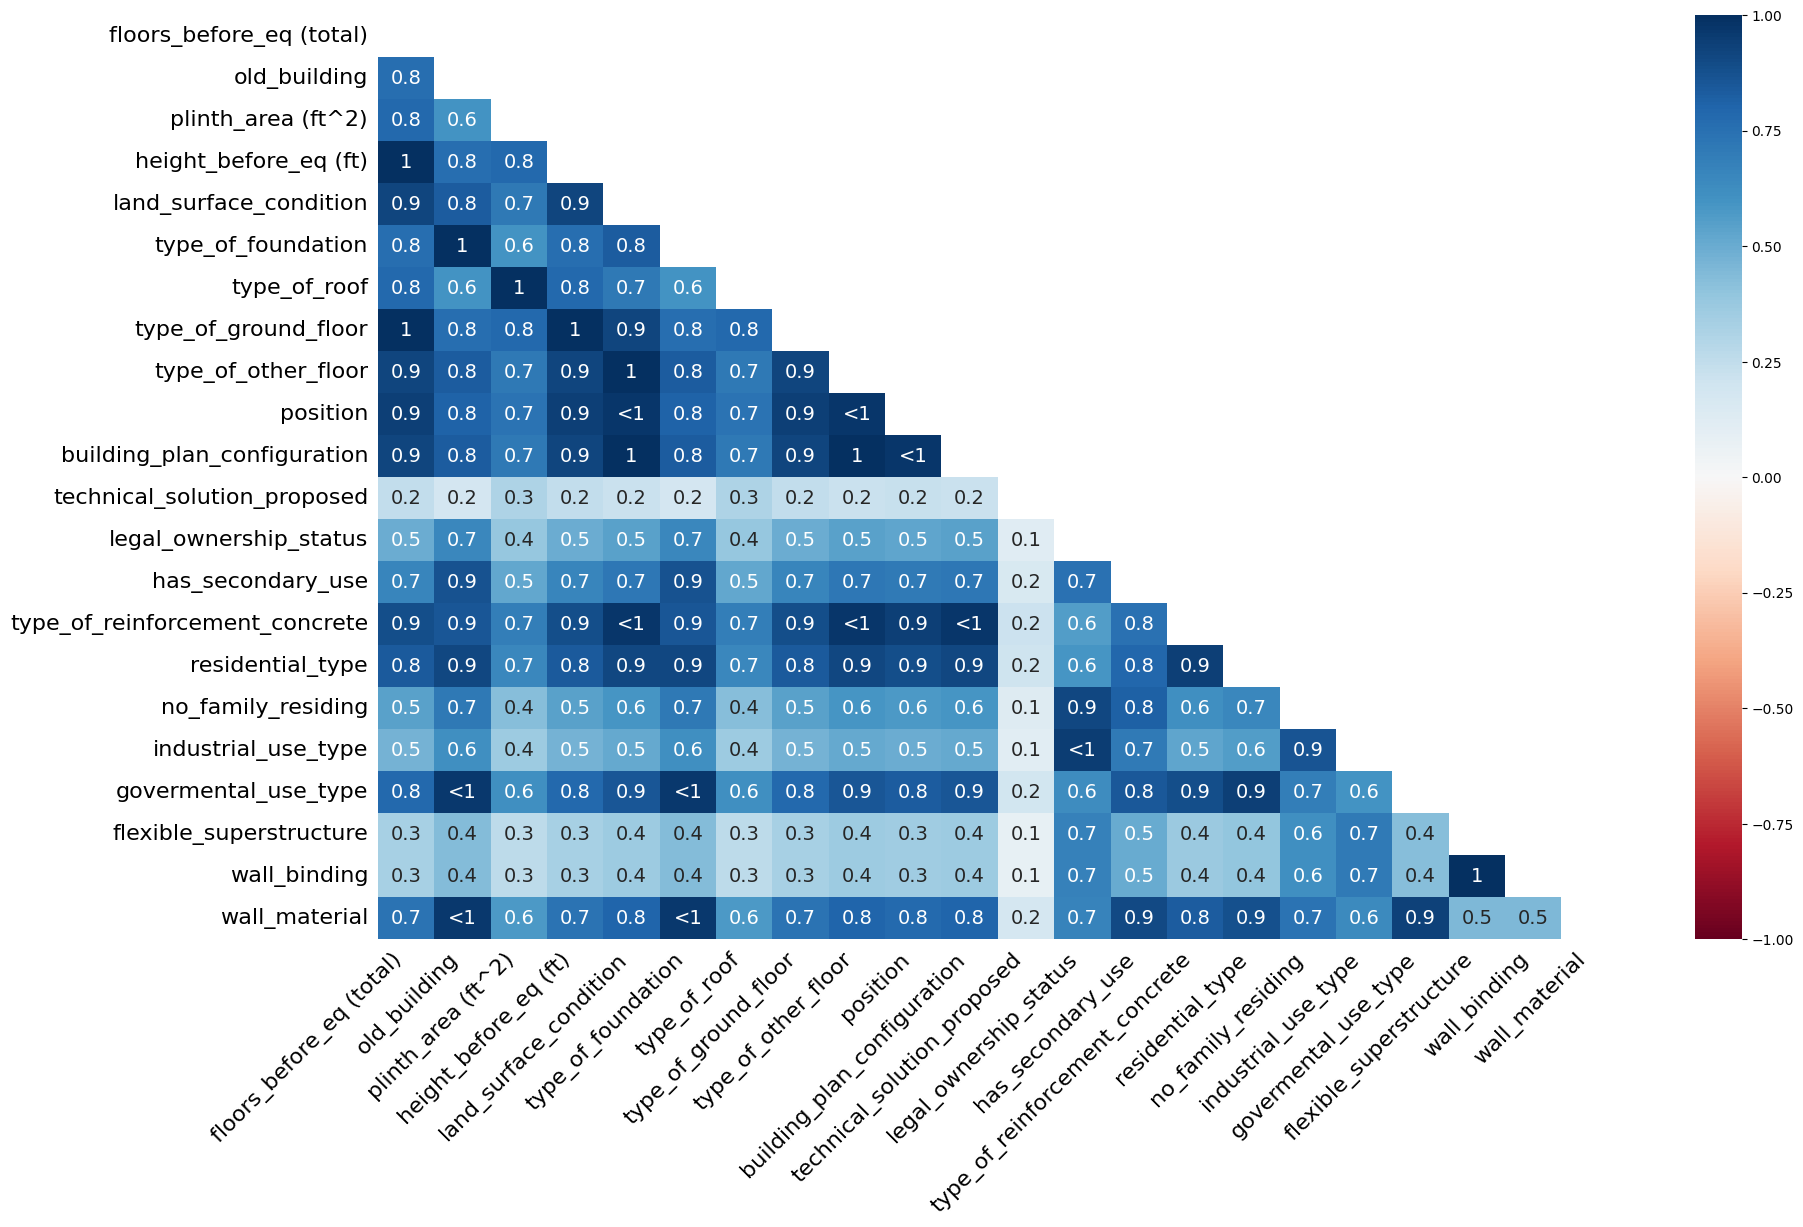

In [38]:
msno.heatmap(df)

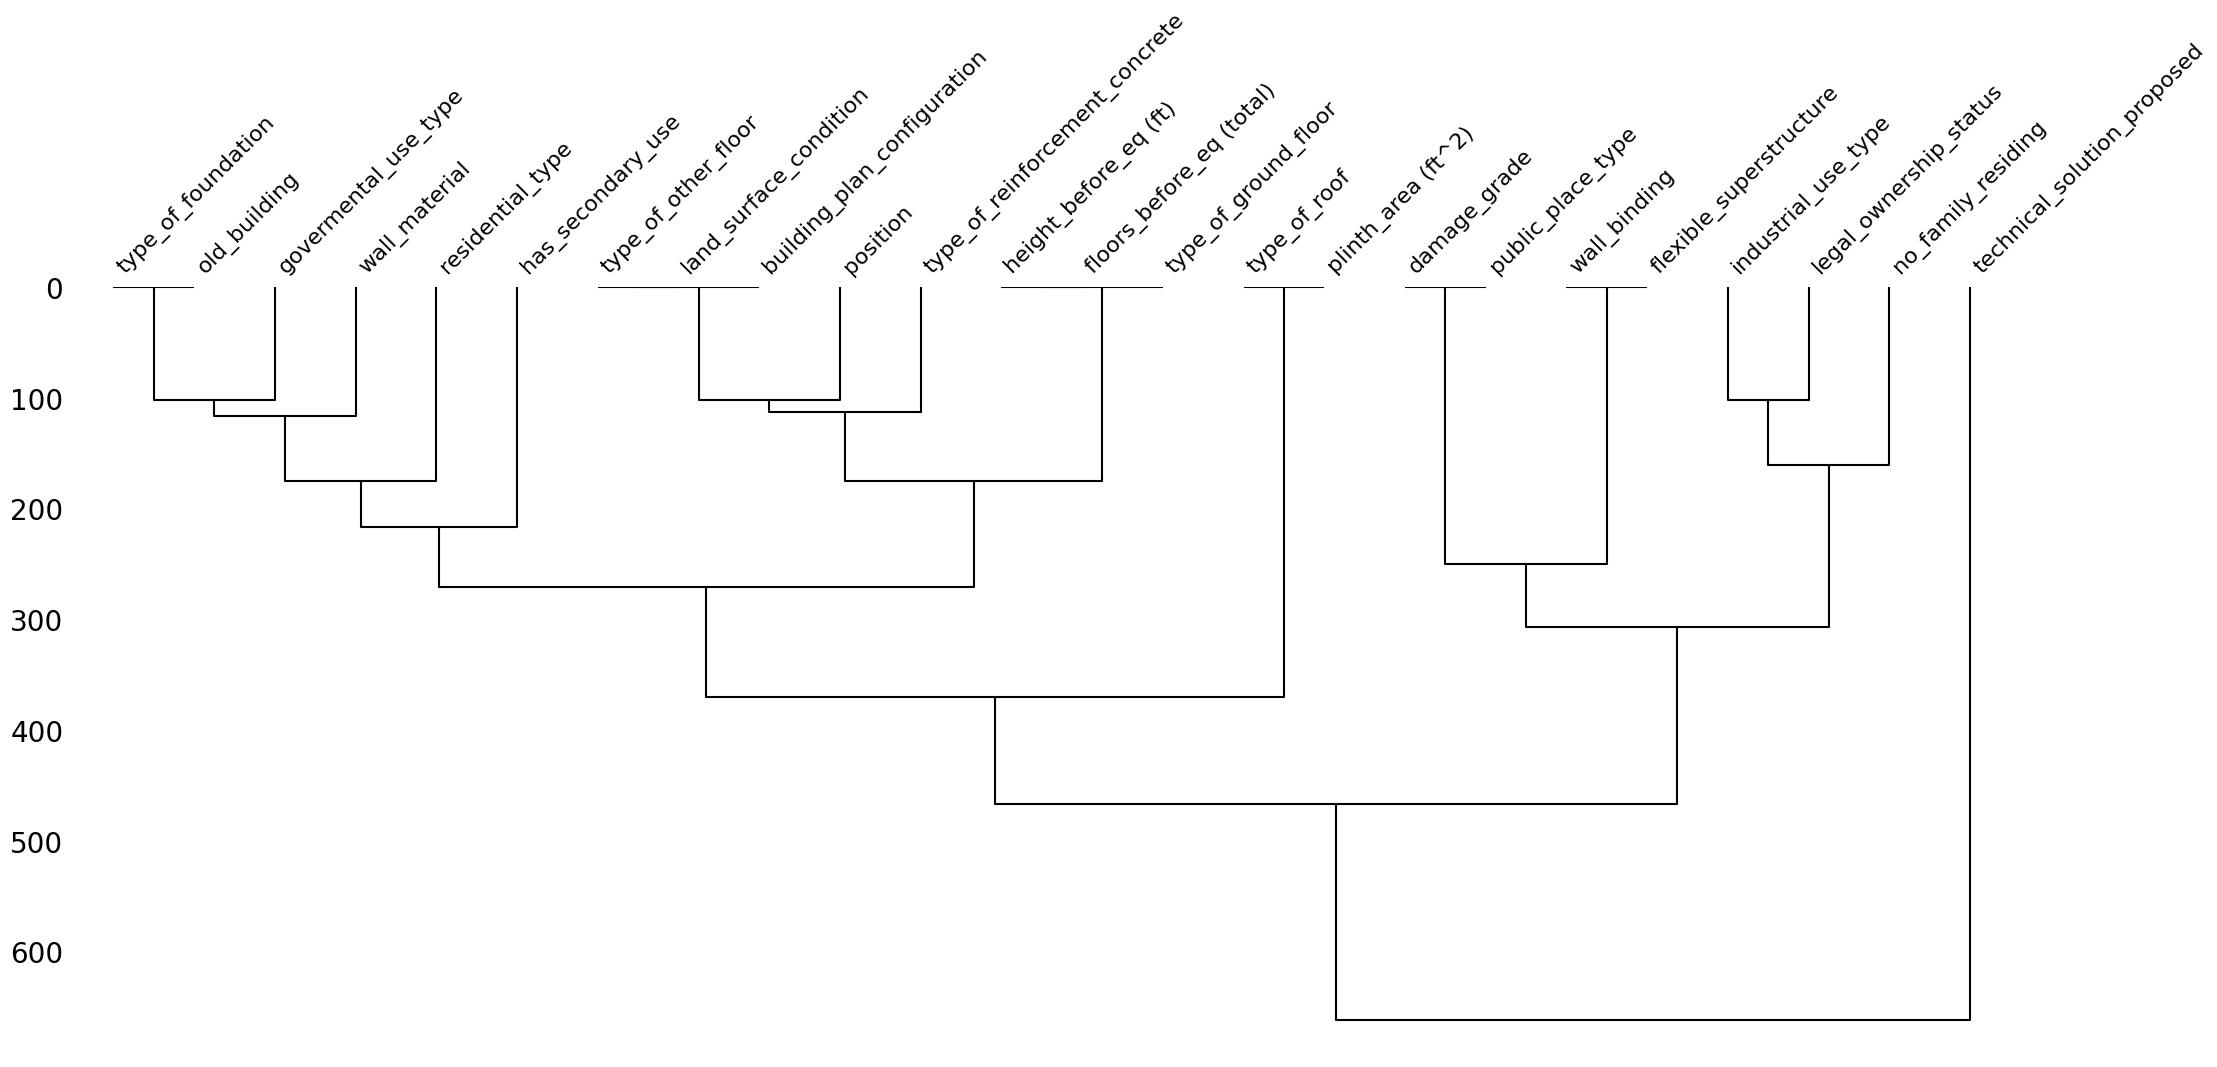

In [39]:
x = msno.dendrogram(df)

2. Handling Missing Value

In [41]:
# Mengisi Missing Value Dengan Modus
df_cat_col = df.select_dtypes(include=('object')).columns
for c in df_cat_col:
    df[c].fillna(df[c].mode().values[0], inplace=True)
    
df.select_dtypes(include=('object')).isna().sum()

floors_before_eq (total)       0
plinth_area (ft^2)             0
land_surface_condition         0
type_of_foundation             0
type_of_roof                   0
type_of_ground_floor           0
type_of_other_floor            0
position                       0
building_plan_configuration    0
technical_solution_proposed    0
legal_ownership_status         0
residential_type               0
no_family_residing             0
public_place_type              0
industrial_use_type            0
govermental_use_type           0
flexible_superstructure        0
dtype: int64

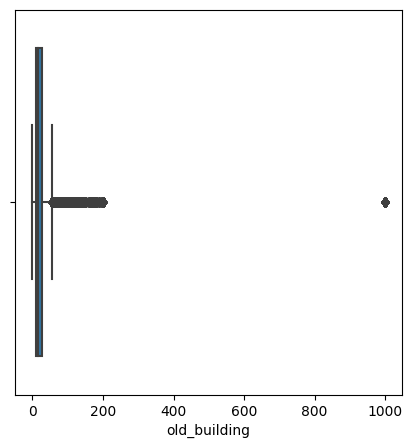

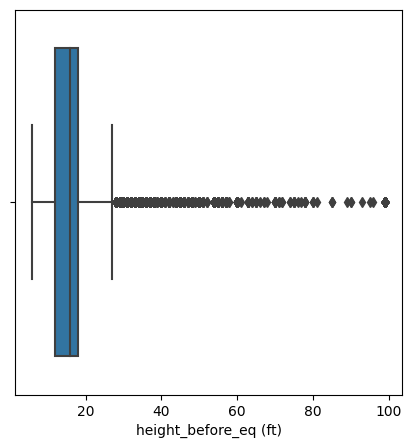

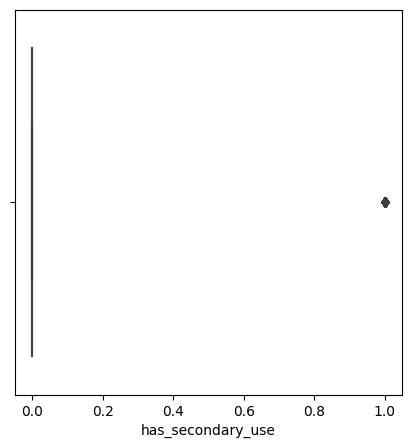

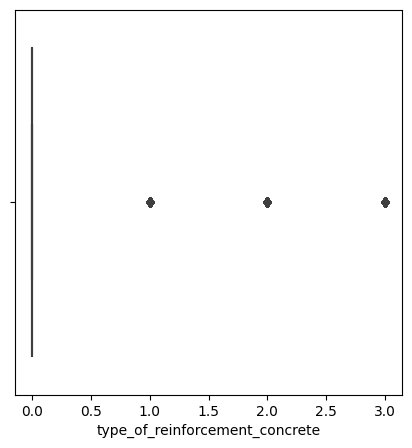

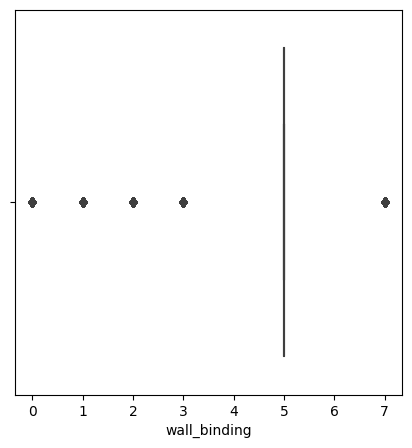

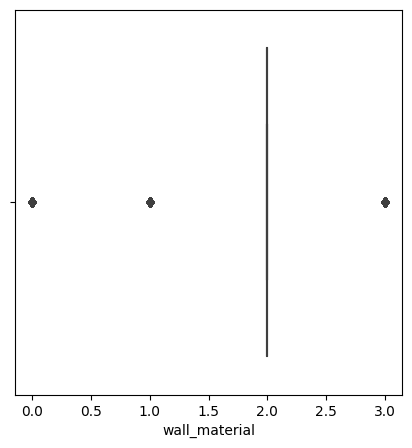

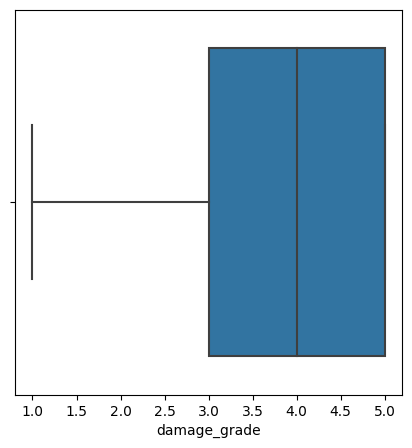

In [49]:
df_num_col = df.select_dtypes(include=('float64','int64')).columns
for col in df_num_col :
    plt.figure(figsize=(5,5))
    sns.boxplot(x = df[col])

In [ ]:
df_num_col = df.select_dtypes(include=('float64','int64')).columns
for c in df_cat_col:
    df[c].fillna(df[c].mode().values[0], inplace=True)
    
df.select_dtypes(include=('object')).isna().sum()